In [1]:
import os
import sys
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

import re
import networkx as nx

from IPython.display import Image
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [194]:
national = pd.read_csv('national.csv')
# national.fillna('-', inplace=True)
ind_scores = pd.read_csv('2015-ind-perf-scores.csv')
# ind_scores.fillna('-', inplace=True)
grp_scores = pd.read_csv('2015-group-perf-scores.csv')
# grp_scores.fillna('-', inplace=True)
grp_exp = pd.read_csv('2015-group-patient.csv')
# grp_exp.fillna('-', inplace=True)

In [17]:
national.shape, set(national.Gender)

((2642881, 41), {'F', 'M'})

,NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name,Suffix,Gender,Credential,Medical school name,...,Hospital affiliation CCN 3,Hospital affiliation LBN 3,Hospital affiliation CCN 4,Hospital affiliation LBN 4,Hospital affiliation CCN 5,Hospital affiliation LBN 5,Professional accepts Medicare Assignment,Reported Quality Measures,Used electronic health records,Committed to heart health through the Million Hearts® initiative.
0,1487927612,4880850486,I20120726000331,HALL,ESTHER,S,-,F,-,LIFE CHIROPRACTIC COLLEGE - WEST,...,-,-,-,-,-,-,Y,-,-,-
1,1346282258,5395768527,I20060113000139,DAVIDSON,JOHN,A,-,M,CSW,OTHER,...,-,-,-,-,-,-,Y,-,-,-
2,1932283124,5193762862,I20050415000143,CAGEN,STEVEN,F,-,M,DC,SHERMAN COLLEGE OF STRAIGHT CHIROPRACTIC,...,-,-,-,-,-,-,Y,-,-,-


In [7]:
npis = set(national.NPI)

In [8]:
len(npis)

1017800

In [9]:
national.shape[0]/len(npis)

2.596660444095107

In [48]:
meisner = national[national.NPI == 1730150434]

In [51]:
meisner['Professional Enrollment ID']

658050    I20100726000256
665797    I20080529000017
838969    I20100726000256
Name: Professional Enrollment ID, dtype: object

In [49]:
meisner['Primary specialty']

658050             HEMATOLOGY
665797    HEMATOLOGY/ONCOLOGY
838969             HEMATOLOGY
Name: Primary specialty, dtype: object

([<matplotlib.axis.XTick at 0x14bfd7208>,
 <a list of 2 Text xticklabel objects>)

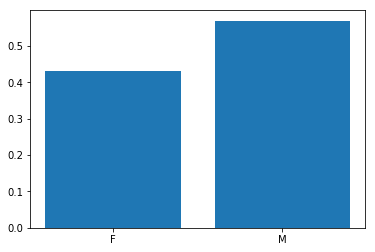

In [33]:
## Near balanced gender ratio

gender, count = np.unique(national.Gender, return_counts=True)
count = count / sum(count)
plt.bar(range(2), count, align='center')
plt.xticks(range(2), gender)

([<matplotlib.axis.XTick at 0x123e90fd0>,
 <a list of 22 Text xticklabel objects>)

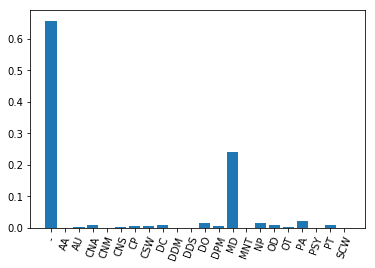

In [65]:
## credential distribution (60% do not report their credentials)

creds = sorted(national.Credential)
cred, cred_count = np.unique(creds, return_counts=True)
cred_count = cred_count / sum(cred_count)
x = range(len(cred))
plt.bar(x, cred_count, align='center')
plt.xticks(x, cred, rotation=70)

([<matplotlib.axis.XTick at 0x12c722e48>,
 <a list of 21 Text xticklabel objects>)

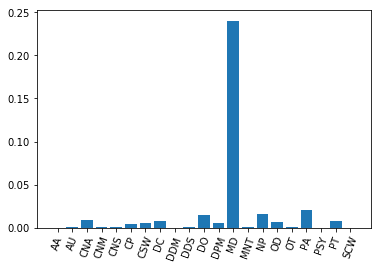

In [64]:
cred2, cred_count2 = list(cred), list(cred_count)
del cred2[0]
del cred_count2[0]
x = range(len(cred2))
plt.bar(x, cred_count2, align='center')
plt.xticks(x, cred2, rotation=70)

In [72]:
grads = sorted(national['Graduation year'])
grad, grad_count = np.unique(grads, return_counts=True)
x = range(len(grad))
plt.bar(x,grad_count, align='center')
plt.xticks(x, grad, rotation=70)

set(national['Graduation year'])

{'-',
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0}

In [74]:
missed_year = national[national['Graduation year'] == '-']

In [75]:
len(missed_year)

7017

In [76]:
ind_scores.shape[0], len(set(ind_scores.NPI))

(495417, 180723)

In [78]:
national[national.NPI == 1508823618]

,NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name,Suffix,Gender,Credential,Medical school name,...,Hospital affiliation CCN 3,Hospital affiliation LBN 3,Hospital affiliation CCN 4,Hospital affiliation LBN 4,Hospital affiliation CCN 5,Hospital affiliation LBN 5,Professional accepts Medicare Assignment,Reported Quality Measures,Used electronic health records,Committed to heart health through the Million Hearts® initiative.
1403542,1508823618,42100117,I20050426000780,GRIFFIN,DAVID,-,-,M,MD,VANDERBILT UNIVERSITY SCHOOL OF MEDICINE,...,420071,SELF REGIONAL HEALTHCARE,-,-,-,-,Y,Y,Y,-
1520675,1508823618,42100117,I20050426000780,GRIFFIN,DAVID,-,-,M,MD,VANDERBILT UNIVERSITY SCHOOL OF MEDICINE,...,420071,SELF REGIONAL HEALTHCARE,-,-,-,-,Y,Y,Y,-
1556653,1508823618,42100117,I20050426000780,GRIFFIN,DAVID,-,-,M,MD,VANDERBILT UNIVERSITY SCHOOL OF MEDICINE,...,420071,SELF REGIONAL HEALTHCARE,-,-,-,-,Y,Y,Y,-
1949284,1508823618,42100117,I20050426000780,GRIFFIN,DAVID,-,-,M,MD,VANDERBILT UNIVERSITY SCHOOL OF MEDICINE,...,420071,SELF REGIONAL HEALTHCARE,-,-,-,-,Y,Y,Y,-
2104630,1508823618,42100117,I20050426000780,GRIFFIN,DAVID,-,-,M,MD,VANDERBILT UNIVERSITY SCHOOL OF MEDICINE,...,420071,SELF REGIONAL HEALTHCARE,-,-,-,-,Y,Y,Y,-
2284442,1508823618,42100117,I20050426000780,GRIFFIN,DAVID,-,-,M,MD,VANDERBILT UNIVERSITY SCHOOL OF MEDICINE,...,420071,SELF REGIONAL HEALTHCARE,-,-,-,-,Y,Y,Y,-
2398820,1508823618,42100117,I20050426000780,GRIFFIN,DAVID,-,-,M,MD,VANDERBILT UNIVERSITY SCHOOL OF MEDICINE,...,420071,SELF REGIONAL HEALTHCARE,-,-,-,-,Y,Y,Y,-


In [87]:
col = 'Committed to heart health through the Million Hearts® initiative.'
national[national[col] == 'Y']['Primary specialty']

62240                                   INTERNAL MEDICINE
62321                                  NURSE PRACTITIONER
62728                     COLORECTAL SURGERY (PROCTOLOGY)
63176                                     GENERAL SURGERY
63192                                     FAMILY PRACTICE
63244                                           OPTOMETRY
63346                                     GENERAL SURGERY
63472                                  NURSE PRACTITIONER
63475                                     FAMILY PRACTICE
63860                                   INTERNAL MEDICINE
64192                                    VASCULAR SURGERY
64557                                  NURSE PRACTITIONER
64630                                   INTERNAL MEDICINE
64662                                     FAMILY PRACTICE
64851                                   INTERNAL MEDICINE
64958                                     FAMILY PRACTICE
64990                                  NURSE PRACTITIONER
65135         

In [93]:
col = 'Group Practice PAC ID'
physician_group = national[national[col] != '-']

In [97]:
physician_group[col].apply(int)

2          7012954787
5          7315961356
7           446314538
9          1052465556
14          143382465
16         8123035862
22         7911080205
29         6709902992
32         2961476148
36         8224105747
39         6204885452
40         5799872321
41         9335466309
44         4385619691
48         3072612696
53         3678465101
56         1153630918
65         1850475047
70         7315920691
80         3072665652
81         1153383849
82         2567526775
88         7113145269
89          941216832
96          648322396
103        6103898762
110        6305829789
113        4880791706
114        3577580869
117        5092836213
              ...    
2642849    3779496856
2642850    3173424082
2642852    2961315718
2642853    1355254368
2642854    6204059470
2642855      42128548
2642856    2365611845
2642857    8426945742
2642858    4587568647
2642859    1456653237
2642860    2466363395
2642861    9234033853
2642862    3476451105
2642863    3577476761
2642864   

In [101]:
grp_scores[grp_scores['Group PAC ID'] == 749180198]

,Organization legal name or 'doing business as' name,Group PAC ID,State,Participating in PQRS,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Footnote,Reporting Mechanism,Reported on PC Live Site
342,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,Y,PQRS_GRP_117_1,Diabetes: Eye Exam,N,79,-,WI,Y
745,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,Y,PQRS_GRP_110_1,Preventive Care and Screening: Influenza Immun...,N,65,-,WI,Y
746,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,Y,PQRS_GRP_111_1,Pneumonia Vaccination Status for Older Adults,N,64,-,WI,Y
747,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,Y,PQRS_GRP_112_1,Breast Cancer Screening,N,80,-,WI,Y
748,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,Y,PQRS_GRP_113_1,Colorectal Cancer Screening,N,70,-,WI,Y
749,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,Y,PQRS_GRP_118_1,Coronary Artery Disease (CAD): Angiotensin-Con...,N,50,-,WI,Y
750,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,Y,PQRS_GRP_128_1,Preventive Care and Screening: Body Mass Index...,N,67,-,WI,Y
751,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,Y,PQRS_GRP_130_1,Documentation of Current Medications in the Me...,N,92,-,WI,Y
752,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,Y,PQRS_GRP_134_1,Preventive Care and Screening: Screening for C...,N,35,-,WI,Y
753,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,Y,PQRS_GRP_204_1,Ischemic Vascular Disease (IVD): Use of Aspiri...,N,84,-,WI,Y


In [102]:
livesites = grp_scores[grp_scores['Reported on PC Live Site'] == 'Y']

In [103]:
livesites.shape[0], grp_scores.shape[0]

(10291, 11117)

In [105]:
set(grp_scores['Reported on PC Live Site'])

{'N', 'Y'}

In [106]:
## Not Reported on PC Live Site
grp_scores.shape[0] - livesites.shape[0]

826

In [107]:
set(grp_scores['Reporting Mechanism'])

{'REG', 'WI'}

In [108]:
grp_scores[grp_scores['Reporting Mechanism'] == 'REG'].shape[0]

7239

In [110]:
grp_measures = set(grp_scores['Measure Identifier'])

In [111]:
len(grp_measures)

112

In [112]:
grp_measures

{'PQRS_GRP_100_1',
 'PQRS_GRP_102_1',
 'PQRS_GRP_109_1',
 'PQRS_GRP_110_1',
 'PQRS_GRP_111_1',
 'PQRS_GRP_112_1',
 'PQRS_GRP_113_1',
 'PQRS_GRP_116_1',
 'PQRS_GRP_117_1',
 'PQRS_GRP_118_1',
 'PQRS_GRP_119_1',
 'PQRS_GRP_121_1',
 'PQRS_GRP_122_1',
 'PQRS_GRP_122_3',
 'PQRS_GRP_126_1',
 'PQRS_GRP_127_1',
 'PQRS_GRP_128_1',
 'PQRS_GRP_12_1',
 'PQRS_GRP_130_1',
 'PQRS_GRP_131_1',
 'PQRS_GRP_134_1',
 'PQRS_GRP_137_1',
 'PQRS_GRP_138_1',
 'PQRS_GRP_140_1',
 'PQRS_GRP_141_1',
 'PQRS_GRP_143_1',
 'PQRS_GRP_144_1',
 'PQRS_GRP_145_1',
 'PQRS_GRP_146_1',
 'PQRS_GRP_147_1',
 'PQRS_GRP_14_1',
 'PQRS_GRP_154_1',
 'PQRS_GRP_155_1',
 'PQRS_GRP_156_1',
 'PQRS_GRP_163_1',
 'PQRS_GRP_173_1',
 'PQRS_GRP_178_1',
 'PQRS_GRP_181_1',
 'PQRS_GRP_182_1',
 'PQRS_GRP_185_1',
 'PQRS_GRP_191_1',
 'PQRS_GRP_193_1',
 'PQRS_GRP_194_1',
 'PQRS_GRP_195_1',
 'PQRS_GRP_19_1',
 'PQRS_GRP_204_1',
 'PQRS_GRP_205_1',
 'PQRS_GRP_217_1',
 'PQRS_GRP_21_1',
 'PQRS_GRP_220_1',
 'PQRS_GRP_221_1',
 'PQRS_GRP_224_1',
 'PQRS_GRP_225_1

In [118]:
grp_exp[grp_exp['Group PAC ID'] == 749180198]

,Organization legal name or 'doing business as' name,Group PAC ID,State,Measure Identifier,Measure Title,Measure Performance Rate,Footnote
296,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,CAHPS_GRP_1,"Getting timely care, appointments, and informa...",54,-
297,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,CAHPS_GRP_10,Between visit communication.,47,-
298,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,CAHPS_GRP_12,Attention to patient medication cost.,29,-
299,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,CAHPS_GRP_2,How well clinicians communicate.,86,-
300,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,CAHPS_GRP_3,Patients' rating of clinicians.,80,-
301,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,CAHPS_GRP_5,Health promotion and education.,61,-
302,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,CAHPS_GRP_8,Courteous and helpful office staff.,82,-
303,"CLINICAL HEALTH CARE ASSOCIATES OF NEW JERSEY, PC",749180198,NJ,CAHPS_GRP_9,Clinicians working together for your care.,74,-


In [115]:
set(grp_exp['Measure Identifier'])

{'CAHPS_GRP_1',
 'CAHPS_GRP_10',
 'CAHPS_GRP_12',
 'CAHPS_GRP_2',
 'CAHPS_GRP_3',
 'CAHPS_GRP_5',
 'CAHPS_GRP_8',
 'CAHPS_GRP_9'}

In [116]:
national.shape[0], ind_scores.shape[0], grp_scores.shape[0], grp_exp.shape[0]

(2642881, 495417, 11117, 3432)

In [122]:
## number of distinct organizations in 3 tables
## most physician submitted their affilitiaions
## very few number of measures records from patients

org_national = set(national['Group Practice PAC ID'])
org_grp_scores = set(grp_scores['Group PAC ID'])
org_grp_exp = set(grp_exp['Group PAC ID'])

len(org_national), len(org_grp_scores), len(org_grp_exp)

(72360, 2371, 429)

In [147]:
groups = org_national.intersection(org_grp_exp).intersection(org_grp_scores)
len(groups)

303

In [124]:
### number of ind EPs with profiles
eps = set(national['NPI'])
len(eps)

1017800

In [125]:
### number of ind EPs have measure data
eps_measured = set(ind_scores['NPI'])
len(eps_measured)

180723

In [128]:
len(set(ind_scores['Measure Identifier']))

131

In [150]:
national[national['Group Practice PAC ID'] == 42105678]['Number of Group Practice members']

941219     192
947569     192
951270     192
951861     192
952714     192
952755     192
955906     192
956499     192
961828     192
963680     192
965437     192
967654     192
968323     192
968421     192
968752     192
971308     192
978459     192
982175     192
982308     192
983255     192
988222     192
988261     192
989001     192
1002400    192
1017199    192
1019177    192
1019493    192
1020722    192
1021774    192
1030548    192
          ... 
2538428    192
2539500    192
2543069    192
2545697    192
2546621    192
2547708    192
2550532    192
2551063    192
2551100    192
2552738    192
2557414    192
2558043    192
2566888    192
2570840    192
2570930    192
2582502    192
2587512    192
2592324    192
2596585    192
2597483    192
2598070    192
2600014    192
2602624    192
2604488    192
2606513    192
2622148    192
2624667    192
2629393    192
2630295    192
2630563    192
Name: Number of Group Practice members, Length: 531, dtype: object

In [151]:
group_size = national[['Group Practice PAC ID', 'Number of Group Practice members']].drop_duplicates()

In [155]:
group_size=group_size.drop(group_size.head(1).index)

In [156]:
grp_sz, count = np.unique(sorted(group_size['Number of Group Practice members']), return_counts=True)

([<matplotlib.axis.XTick at 0x21ea31438>,
 <a list of 596 Text xticklabel objects>)

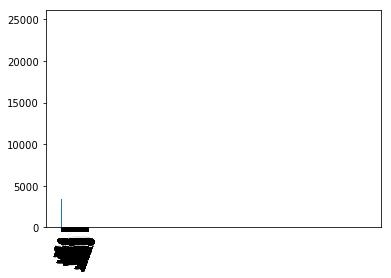

In [158]:
x = range(len(grp_sz))
plt.bar(grp_sz, count, align='center')
plt.xticks(x, grp_sz, rotation=70)

In [195]:
group_scores = grp_scores[['Group PAC ID', 'Measure Identifier', 'Inverse Measure','Measure Performance Rate']]

In [196]:
group_scores.to_csv('group_scores.csv', index=False, sep=',')

In [197]:
group_rates_exp = grp_exp[['Group PAC ID','Measure Identifier','Measure Performance Rate']]

In [198]:
group_rates_exp.to_csv('group_rates_exp.csv', index=False, sep=',')

In [199]:
columns = 'NPI,Gender,Credential,Medical school name,Graduation year,Primary specialty,Organization legal name,Group Practice PAC ID,Number of Group Practice members'.split(',')
ind_group = national[columns]
ind_group.to_csv('ind_group.csv',index=False, sep=',')

In [172]:
group_rates_exp.shape[0], len(set(group_rates_exp['Group PAC ID']))

(3432, 429)

In [173]:
429*8

3432

In [206]:
gids = set(group_rates_exp['Group PAC ID'])
with open('patients_rates.csv', 'a') as file:
    header = 'Group PAC ID,CAHPS_GRP_1,CAHPS_GRP_10,CAHPS_GRP_12,CAHPS_GRP_2,CAHPS_GRP_3,CAHPS_GRP_5,CAHPS_GRP_8,CAHPS_GRP_9\n'
    file.write(header)

    for i in gids:
        cluster = group_rates_exp[group_rates_exp['Group PAC ID'] == i]
        rates = cluster['Measure Performance Rate'].reshape(1, 8)[0]
        line = str(i)
        for rate in rates:
            line += ',' + str(rate)
        file.write(line + '\n')

In [209]:
ind_grp_agg = pd.read_csv('ind_group_agg.csv')

In [211]:
with open('seniority.csv', 'a') as file:
    header = 'Group PAC ID,size,avg experience,excellence,avg rates'
    file.write(header)
    
    for i in gids:
        cluster = group_rates_exp[group_rates_exp['Group PAC ID'] == i]
        

0         35.0
1         35.0
2         35.0
3         35.0
4         35.0
5         35.0
6         35.0
7         35.0
8         35.0
9         35.0
10        35.0
11        35.0
12        35.0
13        35.0
14        28.0
15        28.0
16        28.0
17        28.0
18        28.0
19        28.0
20        28.0
21        28.0
22        28.0
23        28.0
24        28.0
25        28.0
26        28.0
27        28.0
28        28.0
29        28.0
          ... 
332060    21.0
332061    21.0
332062    20.0
332063    20.0
332064    20.0
332065    20.0
332066    20.0
332067    20.0
332068    20.0
332069    20.0
332070    20.0
332071    20.0
332072    20.0
332073    20.0
332074    20.0
332075    20.0
332076    11.0
332077    11.0
332078    11.0
332079    11.0
332080    11.0
332081    11.0
332082    11.0
332083    11.0
332084    11.0
332085    11.0
332086    11.0
332087    11.0
332088    11.0
332089    11.0
Name: Care experience, Length: 332090, dtype: float64

In [219]:
mx = set(ind_grp_agg['Measure Identifier_x'])

In [218]:
my = set(ind_grp_agg['Measure Identifier_y'])

In [226]:
','.join(['rate' + str(i) for i in range(1, len(my) + 1)])

'grpm1,grpm2,grpm3,grpm4,grpm5,grpm6,grpm7,grpm8,grpm9,grpm10,grpm11,grpm12,grpm13,grpm14,grpm15,grpm16,grpm17,grpm18,grpm19,grpm20,grpm21,grpm22,grpm23,grpm24,grpm25,grpm26,grpm27,grpm28,grpm29,grpm30,grpm31,grpm32,grpm33,grpm34,grpm35,grpm36,grpm37,grpm38,grpm39,grpm40,grpm41,grpm42,grpm43,grpm44,grpm45,grpm46,grpm47,grpm48,grpm49,grpm50,grpm51,grpm52,grpm53,grpm54,grpm55,grpm56,grpm57,grpm58,grpm59,grpm60,grpm61,grpm62,grpm63,grpm64,grpm65,grpm66,grpm67,grpm68,grpm69,grpm70,grpm71,grpm72,grpm73,grpm74,grpm75,grpm76,grpm77,grpm78'

In [2]:
data = pd.read_csv('data.csv').fillna(0)

In [3]:
from sklearn.svm import SVR

In [14]:
model = SVR(C=1.0, epsilon=0.2)

In [10]:
dat = data.values

In [246]:
dat.shape

(287, 203)

In [11]:
y = dat[:, -1]
X = dat[:, 1:-9]

In [12]:
f=model.fit(X,y)

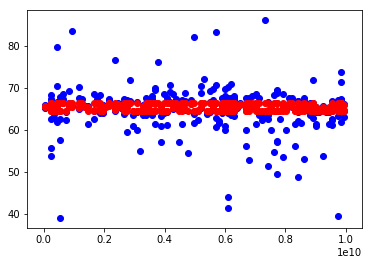

In [15]:
predictions = f.predict(X)

plt.scatter(data['grp'], data['mean_rate'],c='b')
plt.scatter(data['grp'], predictions,c='r')

# plt.scatter(data['year'], data['mean_rate'])
# plt.xlabel('year',size=15)
# plt.ylabel('scores',size=15)

# plt
# lw = 1
# # plt.scatter(X, y, color='darkorange', label='data')
# plt.plot(X, f.predict(X), color='navy', lw=lw, label='RBF model')
# plt.xlabel('data')
# plt.ylabel('target')
# plt.legend()

# plt.show()